## COVID-19 Daily Analysis Table and Heat Map 
  - source:  official data collected by John Hopkins, Stats by Coutry,  https://github.com/CSSEGISandData/
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19

In [1]:
# WARNING ON COUNTRIES BY LAST DAY DEATH  |  ALERTS for the range Thousand / Day group
try:  ## WARNING GERMANY OUT OF DATA FROM TODAY ?
    display(df9.transpose().tail(1) )
    %store df9
except NameError:
    print("Run this cell last after RUN ALL ")

Run this cell last after RUN ALL 


### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.4 MB/s eta 0:00:01B/s eta 0:00:01
     |████████████████████████████████| 215 kB 49.1 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 7.6 MB/s  eta 0:00:01


In [3]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1070      0 --:--:-- --:--:-- --:--:--  1070
100 54349  100 54349    0     0   174k      0 --:--:-- --:--:-- --:--:--  174k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Country/Region,,,,,,,,,,,,,
US,3873,4757,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463,22020
Italy,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899
Spain,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209
France,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210,13197,13832,14393
United Kingdom,1789,2352,2921,3605,4313,4934,5373,6159,7097,7978,8958,9875,10612
Iran,2898,3036,3160,3294,3452,3603,3739,3872,3993,4110,4232,4357,4474
Belgium,705,828,1011,1143,1283,1447,1632,2035,2240,2523,3019,3346,3600
China,3187,3193,3199,3203,3207,3210,3212,3212,3213,3215,3216,3219,3219
Germany,775,920,1107,1275,1444,1584,1810,2016,2349,2607,2767,2736,3022


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Country/Region,,,,,,,,,,,,
US,884,1169,1161,1320,1212,1164,1939,1973,1783,2108,1877,1557
United Kingdom,563,569,684,708,621,439,786,938,881,980,917,737
Spain,923,961,850,749,694,700,704,747,655,634,525,603
France,509,1355,1120,1053,518,833,1417,541,1341,987,635,561
Italy,727,760,766,681,525,636,604,542,610,570,619,431
Germany,145,187,168,169,140,226,206,333,258,160,-31,286
Belgium,123,183,132,140,164,185,403,205,283,496,327,254
Iran,138,124,134,158,151,136,133,121,117,122,125,117
Brazil,39,84,35,86,41,78,122,133,131,107,67,99


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
884,1169,1161,1320,1212,1164,1939,1973,1783,2108,1877,1557"
data-datasets="563,569,684,708,621,439,786,938,881,980,917,737"
data-datasets="923,961,850,749,694,700,704,747,655,634,525,603"
data-datasets="509,1355,1120,1053,518,833,1417,541,1341,987,635,561"
data-datasets="727,760,766,681,525,636,604,542,610,570,619,431"
data-datasets="145,187,168,169,140,226,206,333,258,160,-31,286"
data-datasets="123,183,132,140,164,185,403,205,283,496,327,254"
data-datasets="138,124,134,158,151,136,133,121,117,122,125,117"
data-datasets="39,84,35,86,41,78,122,133,131,107,67,99"
data-datasets="63,79,69,76,73,75,76,87,96,98,95,97"
data-datasets="134,166,148,164,115,101,234,147,148,115,132,94"
data-datasets="55,48,55,75,49,50,56,74,53,54,34,70"
data-datasets="8,11,29,8,8,11,14,5,21,18,26,50"
data-datasets="21,13,11,10,7,11,12,19,40,26,21,46"
data-datasets="23,14,0,14,13,37,14,28,48,20,42,43"
data-datasets="1,8,13,10,19,15,3

In [9]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,Canada,Canada,China,Colombia,Czechia,Denmark,...,Poland,Portugal,Romania,Russia,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
4/1/20,14,18,123,39,4,2,6,1,8,14,...,10,27,10,7,923,59,55,63,563,884
4/2/20,28,12,183,84,16,3,6,2,5,19,...,14,22,23,6,961,69,48,79,569,1169
4/3/20,19,10,132,35,14,25,4,6,9,16,...,14,37,18,4,850,50,55,69,684,1161
4/4/20,25,18,140,86,27,0,4,7,6,22,...,8,20,13,9,749,15,75,76,708,1320
4/5/20,22,18,164,41,25,14,3,3,8,18,...,15,29,5,2,694,28,49,73,621,1212
4/6/20,21,16,185,78,31,46,2,11,11,8,...,13,16,25,2,700,76,50,75,439,1164
4/7/20,20,23,403,122,3,29,0,4,10,16,...,22,34,21,11,704,114,56,76,786,1939
4/8/20,12,30,205,133,0,25,1,4,11,15,...,30,35,23,5,747,96,74,87,938,1973
4/9/20,30,22,283,131,47,41,2,15,13,19,...,15,29,28,13,655,106,53,96,881,1783
4/10/20,21,24,496,107,22,25,1,11,7,10,...,7,26,22,18,634,77,54,98,980,2108


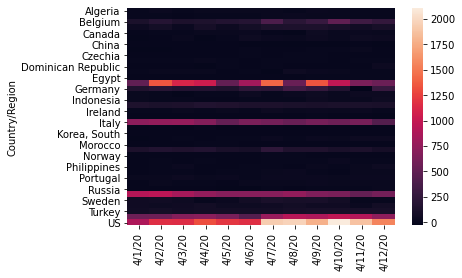

In [10]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

39 18.5


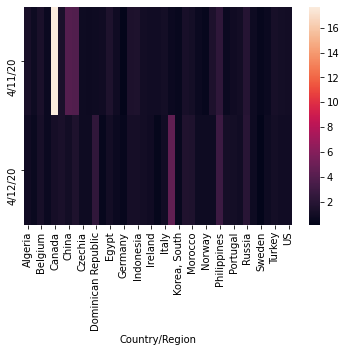

In [11]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [12]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/12/20
Country/Region,
Dominican Republic,3.603448
Philippines,2.736318
Russia,2.490566
Indonesia,2.342593
Japan,1.941176
Mexico,1.803279
India,1.732601
Germany,1.496670
Canada,1.454237


In [13]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [20]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
